#Import the CSV file using Pandas

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/project/Crop_Recommendation_dataset.csv')
df

,Unnamed: 0,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,2,60,55,44,23.004459,82.320763,NaN,263.964248,Rice
3,3,74,35,40,26.491096,80.158363,NaN,242.864034,Rice
4,4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...,...
2195,2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


#Drop Unwanted Columns

In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,NaN,263.964248,Rice
3,74,35,40,26.491096,80.158363,NaN,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


#Check for any missing values

In [ ]:
df.isnull().sum()

Nitrogen         0
Phosphorus       0
Potassium        0
Temperature     47
Humidity        64
pH_Value       116
Rainfall        81
Crop             0
dtype: int64

#Fill in the missing values using mean values.

In [ ]:
df['Temperature']=df['Temperature'].fillna(df['Temperature'].mean())
df['Humidity']=df['Humidity'].fillna(df['Humidity'].mean())
df['pH_Value']=df['pH_Value'].fillna(df['pH_Value'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())

In [ ]:
df['Crop'].value_counts()

Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

In [ ]:
print(df.describe())

          Nitrogen   Phosphorus    Potassium  Temperature     Humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.607259    71.714273   
std      36.917334    32.985883    50.647931     5.006926    21.740454   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.804735    61.078590   
50%      37.000000    51.000000    32.000000    25.607259    80.189211   
75%      84.250000    68.000000    49.000000    28.487184    89.733311   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

          pH_Value     Rainfall  
count  2200.000000  2200.000000  
mean      6.471971   103.815065  
std       0.755571    53.946707  
min       3.504752    20.211267  
25%       6.007327    65.607636  
50%       6.471164    97.575340  
75%       6.884233   122.047254  
max       9.935091   298.401847  


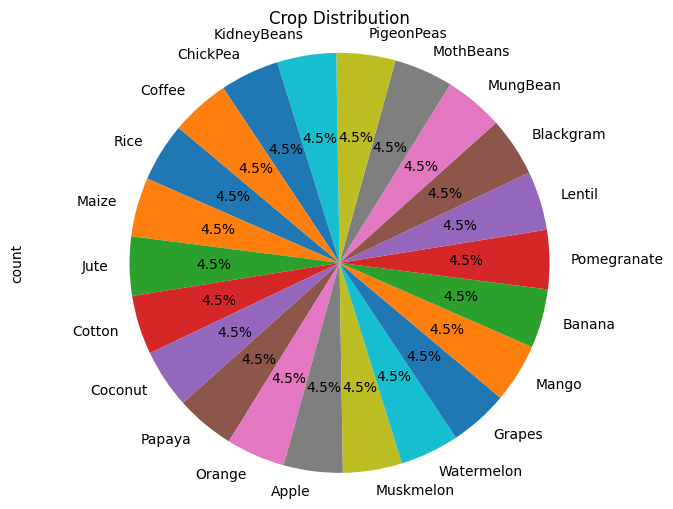

In [ ]:
# Bar chart for crop distribution
plt.figure(figsize=(8, 6))
df['Crop'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Crop Distribution')
plt.axis('equal')
plt.show()

In [ ]:
# Encode the categorical target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Crop'] = le.fit_transform(df['Crop'])

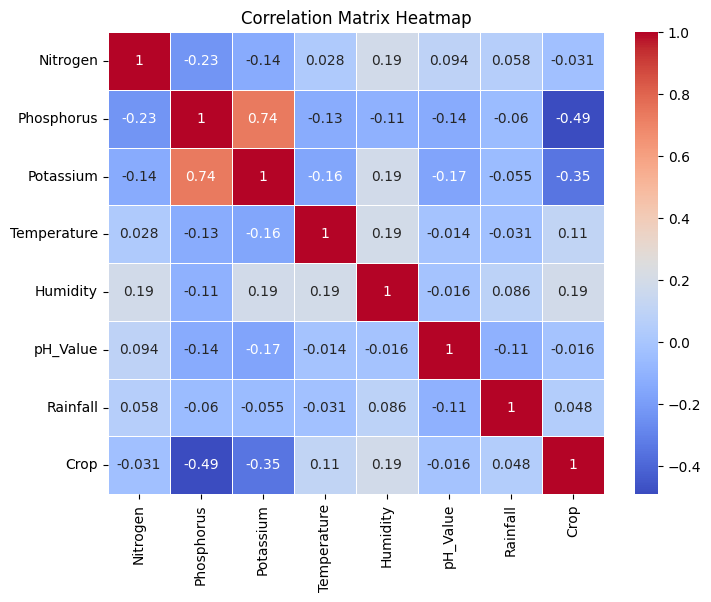

In [ ]:
#Heatmap for correlation matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#Assign the features to X

In [ ]:
X=df.iloc[:,0:-1]
X

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,6.471971,263.964248
3,74,35,40,26.491096,80.158363,6.471971,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


#Assign the labels to y

In [ ]:
y=df.iloc[:,-1]
y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: Crop, Length: 2200, dtype: int64

#Scale the values of X to between 0 and 1 using MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X,y)
X

array([[0.64285714, 0.26428571, 0.19      , ..., 0.79026683, 0.46626364,
        0.65683126],
       [0.60714286, 0.37857143, 0.18      , ..., 0.77063285, 0.54948026,
        0.74209655],
       [0.42857143, 0.35714286, 0.195     , ..., 0.79397664, 0.46144049,
        0.87620861],
       ...,
       [0.84285714, 0.2       , 0.125     , ..., 0.61788046, 0.44443315,
        0.55038374],
       [0.83571429, 0.19285714, 0.145     , ..., 0.44175991, 0.50604494,
        0.38449909],
       [0.74285714, 0.09285714, 0.125     , ..., 0.53822177, 0.50931694,
        0.43396787]])

#Split the dataset into Train and Test Set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

#Build the Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

#Predict with the Test Set

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([ 7, 15,  9, 15,  8, 21,  9, 16,  8, 18, 19,  8,  5, 12, 13,  1,  1,
        4,  1, 16, 10,  0, 19, 17, 15,  1,  7,  4,  6, 21, 11, 11, 15,  0,
       13,  6, 12,  2, 14, 16, 18,  7, 16, 17,  4, 19, 17,  5,  3,  8,  3,
       11, 10, 19,  5, 14, 21, 21,  6, 12,  2, 14, 19,  1,  5, 15,  3,  7,
        0,  8,  7, 12, 16, 11, 20, 21, 21, 11,  6, 12,  3,  1,  0, 16,  6,
        2,  6, 12, 13, 19,  8, 18,  7, 21, 14, 14,  9,  6,  7, 14,  1,  8,
       17, 13,  4, 17, 19,  1,  6, 11, 14,  0, 19,  3, 15, 10,  2, 13, 11,
        5,  2,  8, 15,  6,  9,  3,  9, 13, 21, 14,  8,  2, 16,  0,  9,  3,
        6,  4,  3, 14, 10,  2,  5, 18, 15, 19, 17, 10, 13, 21, 14,  4, 10,
       17, 12, 14, 11,  2,  6,  8, 20, 20,  7, 17, 21, 18, 14,  0, 13,  3,
       18,  4, 18, 10,  7,  8, 20, 20,  6,  7,  6,  7,  6, 15,  2, 19,  5,
       17,  7,  1, 21, 16,  1,  0, 15, 14, 10,  7,  8,  8,  4,  2, 15, 14,
       18, 20, 11, 10,  1, 19, 21, 20,  8,  9, 15, 11,  8, 10,  5,  5, 13,
        8,  9,  6, 11, 15

#Calculate the Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9704545454545455

#Perform HyperParameter Tuning and find the best Parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
params={'n_neighbors':[3,5,7,9],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
clf=GridSearchCV(model,params,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
clf.best_params_

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3,weights='distance',algorithm='auto')
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        18
           2       0.92      1.00      0.96        22
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        17
           6       0.96      1.00      0.98        22
           7       1.00      1.00      1.00        29
           8       0.85      0.92      0.88        25
           9       0.95      1.00      0.98        20
          10       0.89      0.94      0.92        18
          11       1.00      0.95      0.97        20
          12       1.00      0.94      0.97        17
          13       0.95      0.88      0.91        24
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        26
          16       1.00      1.00      1.00        15
          17       1.00    

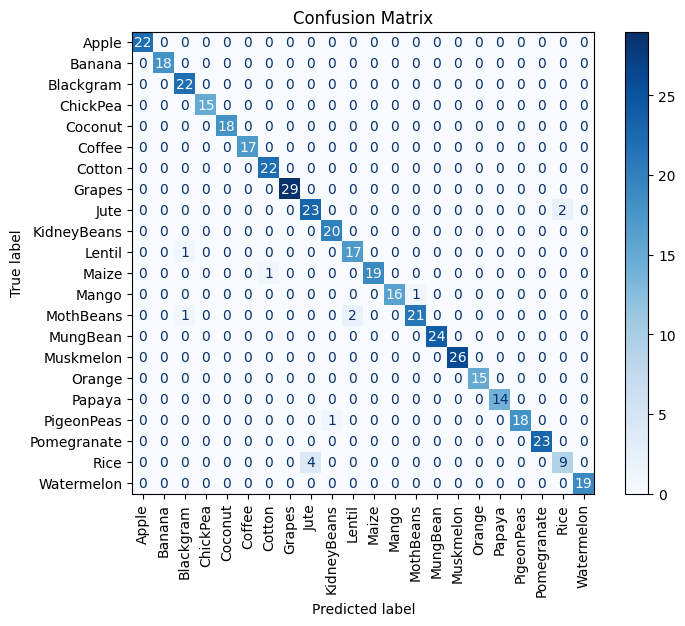

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
ConfusionMatrixDisplay(conf_matrix, display_labels=le.classes_).plot(cmap='Blues',ax=plt.gca(),xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
y_new=knn.predict(scaler.transform([[104,18,30,23.603016,60.396475,6.779833,140.937041]]))
result=le.inverse_transform(y_new)[0]
print(result)

Coffee


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pickle
pickle.dump(model,open('crop_prediction1.sav','wb'))

In [ ]:
pickle.dump(scaler,open('minmaxscaler.sav','wb'))